<a href="https://colab.research.google.com/github/ntlgiang/Capstone-Projects/blob/master/DL_Facial_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perform Facial Recognition with Deep Learning in Keras Using CNN**

**DESCRIPTION**

Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.
Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.
Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0
Prerequisites:
Keras
Scikit Learn
Steps to be followed:
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:

    *   i. Convolutional Layer
    *   ii. Pooling Layer
    *   iii. Fully Connected Layer

6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%

**1. Input the libraries**

In [1]:
# Data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

#Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

#Keras API Tensorflow 2 libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU
from keras.layers.noise import AlphaDropout
from tensorflow.keras.optimizers import Adam

from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.utils.np_utils import to_categorical

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.6.0


**2. Load the dataset**

In [2]:
#load dataset
from numpy import load

data = load('/content/drive/MyDrive/Colab Notebooks/Dataset/Facial Recognition/ORL_faces.npz')

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('----------------------------------------------------------------------')
print('Y-train: {}'.format(y_train))
print('----------------------------------------------------------------------')
print('x_test: {}'.format(x_test[:]))
print('----------------------------------------------------------------------')
print('Y-test: {}'.format(y_test))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
----------------------------------------------------------------------
Y-train: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 

**3. Split the dataset**

In [3]:
print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('----------------------------------------------------------------------')
print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))

x_train shape: (240, 10304)
y_train shape: (240,)
----------------------------------------------------------------------
x_test shape: (160, 10304)
y_test shape: (160,)


**4. Transform the images to equal sizes to feed in CNN**

In [4]:
x_train, x_test, y_train, y_test= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

In [5]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (12,)


**5. Build a CNN model that has 3 main layers:**



*   Convolutional Layer
*   Pooling Layer
*   Fully Connected Layer


In [6]:
#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2048, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [7]:
#Show the model's parameters.
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24624)             0         
_________________________________________________________________
dense (Dense)                (None, 2048)              50432000  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0

**6. Train the model**

In [8]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_test),np.array(y_test)),
)

Epoch 1/250
1/1 - 9s - loss: 3.0035 - accuracy: 0.0746 - val_loss: 3.0203 - val_accuracy: 0.0833
Epoch 2/250
1/1 - 7s - loss: 3.0284 - accuracy: 0.0526 - val_loss: 3.0438 - val_accuracy: 0.0000e+00
Epoch 3/250
1/1 - 8s - loss: 3.0518 - accuracy: 0.0395 - val_loss: 3.0383 - val_accuracy: 0.0000e+00
Epoch 4/250
1/1 - 7s - loss: 3.0311 - accuracy: 0.0307 - val_loss: 3.0194 - val_accuracy: 0.0000e+00
Epoch 5/250
1/1 - 7s - loss: 3.0217 - accuracy: 0.0658 - val_loss: 3.0084 - val_accuracy: 0.0000e+00
Epoch 6/250
1/1 - 7s - loss: 3.0170 - accuracy: 0.0833 - val_loss: 3.0050 - val_accuracy: 0.0000e+00
Epoch 7/250
1/1 - 7s - loss: 3.0447 - accuracy: 0.0351 - val_loss: 2.9981 - val_accuracy: 0.0000e+00
Epoch 8/250
1/1 - 7s - loss: 3.0126 - accuracy: 0.0351 - val_loss: 2.9946 - val_accuracy: 0.0000e+00
Epoch 9/250
1/1 - 7s - loss: 2.9977 - accuracy: 0.0439 - val_loss: 2.9941 - val_accuracy: 0.0000e+00
Epoch 10/250
1/1 - 7s - loss: 3.0071 - accuracy: 0.0614 - val_loss: 2.9960 - val_accuracy: 0.00

**7. Plot the result**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


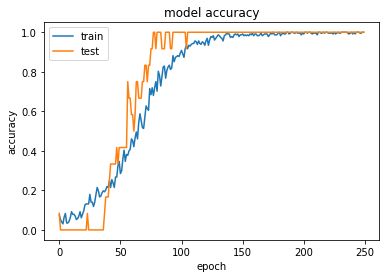

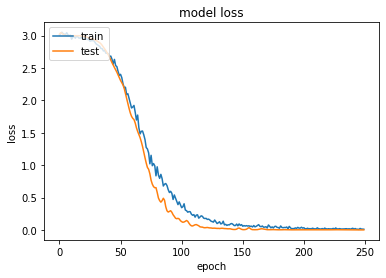

In [10]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**8. Iterate the model until the accuracy is above 90%**

In [11]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)
print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.0007
test acc 1.0000


The accuracy is above 90%